In [122]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
from rasterio.rio.helpers import to_lower

In [123]:
# Einlesen der Daten
df_abstimmungen = pd.read_csv('data/dataset.csv', sep=";")
file_path = "data/maps/swissboundaries.shp/swissBOUNDARIES3D_1_5_TLM_KANTONSGEBIET.shp"
schweizer_karte = gpd.read_file(file_path)

kanton_map = {
    'zh': 'Zürich', 'be': 'Bern', 'lu': 'Luzern', 'ur': 'Uri', 'sz': 'Schwyz',
    'ow': 'Obwalden', 'nw': 'Nidwalden', 'gl': 'Glarus', 'zg': 'Zug',
    'fr': 'Fribourg', 'so': 'Solothurn', 'bs': 'Basel-Stadt',
    'bl': 'Basel-Landschaft', 'sh': 'Schaffhausen', 'ar': 'Appenzell Ausserrhoden',
    'ai': 'Appenzell Innerrhoden', 'sg': 'St. Gallen', 'gr': 'Graubünden',
    'ag': 'Aargau', 'tg': 'Thurgau', 'ti': 'Ticino', 'vd': 'Vaud',
    'vs': 'Valais', 'ne': 'Neuchâtel', 'ge': 'Genève', 'ju': 'Jura'
}

df_abstimmungen

,anr,datum,titel_kurz_d,titel_kurz_f,titel_kurz_e,titel_off_d,titel_off_f,stichwort,swissvoteslink,anzahl,...,bkresults-fr,bfsdash-de,bfsdash-fr,bfsdash-en,bfsmap-de,bfsmap-fr,bfsmap-en,nach_cockpit_d,nach_cockpit_f,nach_cockpit_e
0,1.0,12.09.1848,Bundesverfassung der schweizerischen Eidgenoss...,Constitution fédérale de la Confédération suisse,Federal Constitution of the Swiss Confederation,Totalrevision vom 12. September 1848,Révision totale du 12 septembre 1848,.,https://swissvotes.ch/vote/1.00,1,...,https://www.bk.admin.ch/ch/f/pore/va/18480606/...,.,.,.,NaN,NaN,.,.,.,.
1,2.0,14.01.1866,Mass und Gewicht,Poids et mesures,Weights and measures,Festsetzung von Mass und Gewicht,Poids et mesures,.,https://swissvotes.ch/vote/2.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
2,3.0,14.01.1866,Gleichstellung der Juden und Naturalisierten m...,Egalité des Juifs,Equal rights for Jews and naturalised citizens...,Gleichstellung der Juden und Naturalisierten m...,Egalité des citoyens au point de vue de l'étab...,.,https://swissvotes.ch/vote/3.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
3,4.0,14.01.1866,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",Swiss residents' right to vote in communal mat...,Stimmrecht der Niedergelassenen in Gemeindeang...,"Droit de vote des Suisses établis, en matière ...",.,https://swissvotes.ch/vote/4.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
4,5.0,14.01.1866,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,Taxation and civil law status of Swiss residents,Besteuerung und zivilrechtliche Verhältnisse d...,Impôts et rapports civils des Suisses établis,.,https://swissvotes.ch/vote/5.00,9,...,https://www.bk.admin.ch/ch/f/pore/va/18660114/...,.,.,.,https://www.atlas.bfs.admin.ch/maps/12/map/map...,https://www.atlas.bfs.admin.ch/maps/12/map/map...,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,673.0,24.11.2024,Ausbau des Autobahnnetzes,Extension du réseau autoroutier,Expansion of the motorway network,Bundesbeschluss über den Ausbauschritt 2023 fü...,Arrêté fédéral sur l’étape d’aménagement 2023 ...,.,https://swissvotes.ch/vote/673.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,https://abstimmungen.admin.ch/fr/details/2024-...,https://abstimmungen.admin.ch/en/details/2024-...,https://abstimmungen.admin.ch/de/embed/2024-11...,https://abstimmungen.admin.ch/fr/embed/2024-11...,https://abstimmungen.admin.ch/en/embed/2024-11...,NaN,NaN,NaN
692,674.0,24.11.2024,Bedingungen für Untermiete,Conditions pour la sous-location,Conditions for subletting,Änderung des Obligationenrechts (Mietrecht: Un...,Modification du code des obligations (droit du...,.,https://swissvotes.ch/vote/674.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,https://abstimmungen.admin.ch/fr/details/2024-...,https://abstimmungen.admin.ch/en/details/2024-...,https://abstimmungen.admin.ch/de/embed/2024-11...,https://abstimmungen.admin.ch/fr/embed/2024-11...,https://abstimmungen.admin.ch/en/embed/2024-11...,NaN,NaN,NaN
693,675.0,24.11.2024,Kündigung wegen Eigenbedarfs (Mietrecht),Résiliation pour besoin propre (droit du bail),Termination due to personal need (tenancy law),Änderung des Obligationenrechts (Mietrecht: Kü...,Modification du code des obligations (droit du...,.,https://swissvotes.ch/vote/675.00,4,...,https://www.bk.admin.ch/ch/f/pore/va/20241124/...,https://abstimmungen.admin.ch/details/2024-11-...,htt

In [124]:
# Plot der Schweizer Kate Funktion
def plot_abstimmungen_schweiz(abstimmung: str):
    # Filtern
    filtered_abstimmungen = filter_for_abstimmung(abstimmung)
    # Mergen
    data_to_plot = merge_data_to_plot(filtered_abstimmungen, schweizer_karte)
    # Plotten

    norm = mcolors.Normalize(vmin=0, vmax=100)
    cmap = cm.get_cmap("viridis")  # oder ein benutzerdefinierter Verlauf

    fig, ax = plt.subplots(figsize=(12, 8))

    data_to_plot.plot(
    column='Ja-Prozent',
    cmap='viridis',
    linewidth=0.8,
    edgecolor='black',
    ax=ax
    )

    # Colorbar vorbereiten (manuell!)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []  # Dummy für ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, shrink=0.6, pad=0.02)
    cbar.set_label("Ja-Stimmen in %")

    plt.title(f"Karte der Schweiz Ja Abstimmungen: {abstimmung}")
    plt.axis("off")  # Achsen ausblenden

    # Titel und Achsen
    ax.set_title(f"Ja-Stimmen nach Kanton: {abstimmung}", fontsize=14)
    ax.axis("off")

    # Legende weiter rechts positionieren
    fig.subplots_adjust(right=0.85)
    plt.show()

# Gesucht wird nach dem Kurz Titel
def filter_for_abstimmung(abstimmung: str):
    # Filter vorbereiten
    row_filter = df_abstimmungen['titel_kurz_d'].str.contains(abstimmung, case=False, regex=True)
    print(row_filter)
    col_filter = df_abstimmungen.filter(regex='-japroz', axis=1).columns
    return df_abstimmungen.loc[row_filter, col_filter]

def merge_data_to_plot(df_filtered_abstimmungen: pd.DataFrame, df_schweizer_karte: gpd.GeoDataFrame):
    if df_filtered_abstimmungen.empty:
        raise ValueError("Keine passende Abstimmung gefunden!")

    # Falls mehrere Zeilen gefiltert wurden, nimm die erste
    erste_zeile = df_filtered_abstimmungen.iloc[0]
    ja_stimmen = erste_zeile.rename(lambda x: x.replace('-japroz', ''))

    # Dataframe erstellen mit Prozentwerten
    ja_df = pd.DataFrame({
        'Kürzel': ja_stimmen.index,
        'Ja-Prozent': ja_stimmen.values
    })

    # Mapping
    ja_df['NAME'] = ja_df['Kürzel'].map(kanton_map)
    merged = df_schweizer_karte.merge(ja_df, on='NAME')
    return merged

# Analyse Abstimmungsergebnisse

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/3941926530.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # oder ein benutzerdefinierter Verlauf


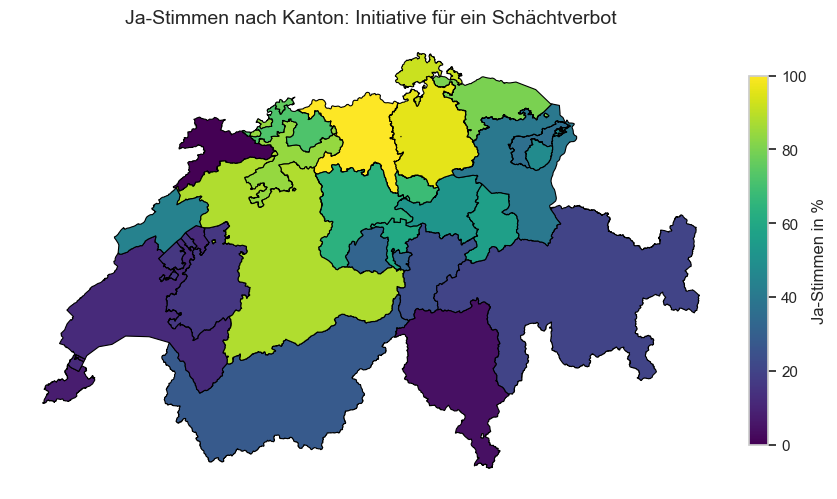

In [125]:
plot_abstimmungen_schweiz('Initiative für ein Schächtverbot')

0      False
1      False
2       True
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/3941926530.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # oder ein benutzerdefinierter Verlauf


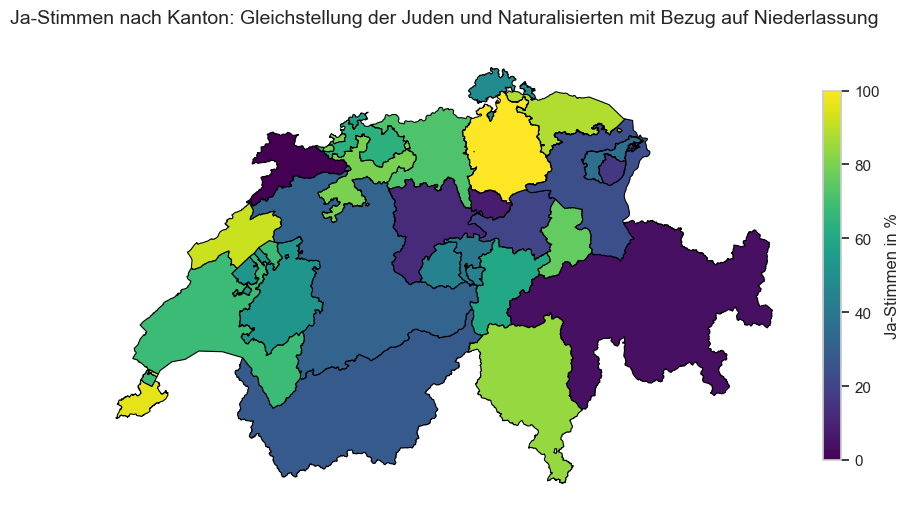

In [126]:
plot_abstimmungen_schweiz('Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung')

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/3941926530.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # oder ein benutzerdefinierter Verlauf


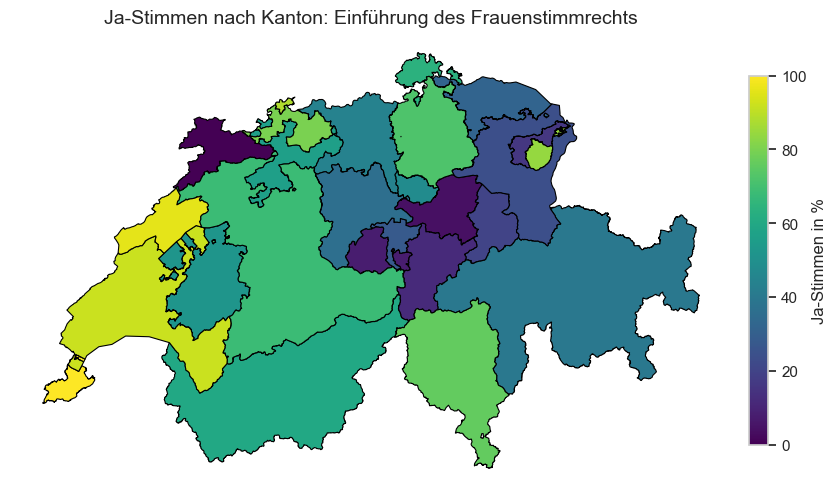

In [127]:
plot_abstimmungen_schweiz('Einführung des Frauenstimmrechts')

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/3941926530.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # oder ein benutzerdefinierter Verlauf


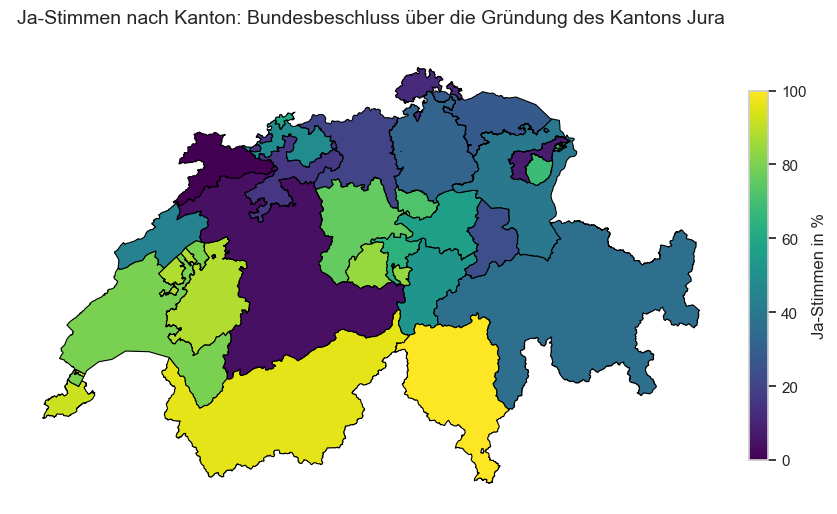

In [128]:
plot_abstimmungen_schweiz('Bundesbeschluss über die Gründung des Kantons Jura')

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool


/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/3941926530.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")  # oder ein benutzerdefinierter Verlauf


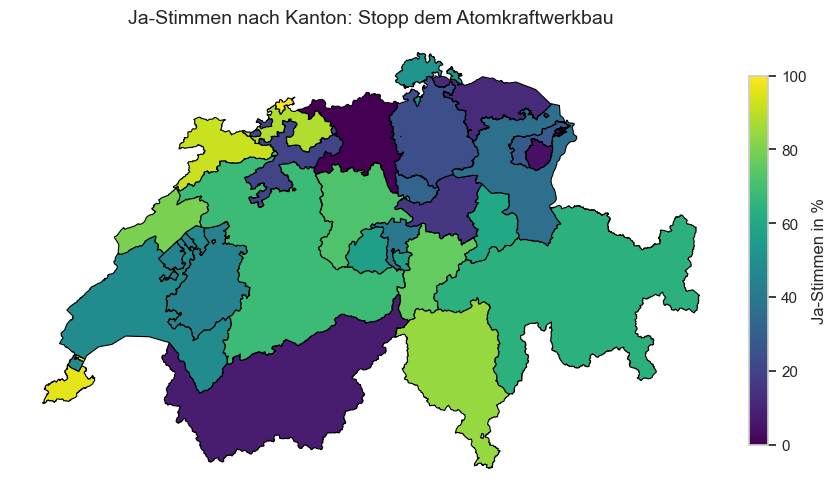

In [129]:
plot_abstimmungen_schweiz("Stopp dem Atomkraftwerkbau")

# Analyse nach urbane und ländliche Kantone

In [130]:
sprachgruppen_eindeutig = {
    'ge': 'französisch', 'vd': 'französisch', 'ne': 'französisch', 'ju': 'französisch', 'fr': 'französisch',
    'ti': 'italienisch',
    'zh': 'deutsch', 'be': 'deutsch', 'lu': 'deutsch', 'ur': 'deutsch', 'sz': 'deutsch',
    'ow': 'deutsch', 'nw': 'deutsch', 'gl': 'deutsch', 'zg': 'deutsch', 'so': 'deutsch',
    'bs': 'deutsch', 'bl': 'deutsch', 'sh': 'deutsch', 'ar': 'deutsch', 'ai': 'deutsch',
    'sg': 'deutsch', 'gr': 'deutsch', 'ag': 'deutsch', 'tg': 'deutsch', 'vs': 'deutsch'
}

raumgruppen_eindeutig = {
    'zh': 'Urban', 'be': 'Urban', 'bs': 'Urban', 'ge': 'Urban', 'vd': 'Urban', 'sg': 'Urban',
    'ag': 'Urban', 'lu': 'Urban', 'bl': 'Urban',
    'ur': 'Ländlich', 'sz': 'Ländlich', 'ow': 'Ländlich', 'nw': 'Ländlich', 'gl': 'Ländlich',
    'zg': 'Ländlich', 'fr': 'Ländlich', 'so': 'Ländlich', 'sh': 'Ländlich',
    'ar': 'Ländlich', 'ai': 'Ländlich', 'gr': 'Ländlich', 'tg': 'Ländlich', 'ti': 'Ländlich',
    'vs': 'Ländlich', 'ne': 'Ländlich', 'ju': 'Ländlich'
}

## Analyse Durchschnitt und Verteilung

In [131]:
def boxplot_von_abstimmungen_nach_gruppen(df_abstimmung_kantone):
    japroz_columns = [col for col in df_abstimmung_kantone.columns if col.endswith('-japroz')]

    df_long = df_abstimmung_kantone[japroz_columns].melt(var_name='Kanton_Ja', value_name='Ja-Prozent')
    df_long['Kanton'] = df_long['Kanton_Ja'].str.split('-').str[0]
    df_long['Kanton'] = df_long['Kanton'].str.lower()  # Einheitliche Kleinbuchstaben

    print(df_long)
    # Sicherstellen, dass 'Ja-Prozent' numerisch ist
    df_long['Ja-Prozent'] = pd.to_numeric(df_long['Ja-Prozent'], errors='coerce')

    df_long = set_gruppen(df_long)

    # Stil für klares Layout
    sns.set(style="whitegrid")

    # Zwei Subplots nebeneinander
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

     # === Raumstruktur ===
    sns.boxplot(
        data=df_long,
        x='Raumstruktur',
        y='Ja-Prozent',
        palette='Set2',
        width=0.6,
        ax=axes[0],
        showfliers=False
    )
    sns.stripplot(
        data=df_long,
        x='Raumstruktur',
        y='Ja-Prozent',
        color='black',
        size=4,
        alpha=0.5,
        jitter=True,
        ax=axes[0]
    )
    raum_sizes = df_long.groupby('Raumstruktur').size()
    axes[0].set_xticklabels([f"{g}\n(n={raum_sizes[g]})" for g in raum_sizes.index])
    axes[0].set_title("Ja-Stimmen nach Raumstruktur", fontsize=14)
    axes[0].set_xlabel("Raumstruktur")
    axes[0].set_ylabel("Ja-Prozent")
    axes[0].set_ylim(0, 100)
    axes[0].set_yticks(range(0, 101, 10))
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)

    # === Sprache ===
    # Gruppen nach Anzahl splitten
    sprache_sizes = df_long['Sprache'].value_counts()
    große_sprachen = sprache_sizes[sprache_sizes > 2].index
    kleine_sprachen = sprache_sizes[sprache_sizes <= 2].index

    # Boxplot nur für große Gruppen
    sns.boxplot(
        data=df_long[df_long['Sprache'].isin(große_sprachen)],
        x='Sprache',
        y='Ja-Prozent',
        palette='Set2',
        width=0.6,
        ax=axes[1],
        showfliers=False
    )

    # Stripplot für alle
    sns.stripplot(
        data=df_long,
        x='Sprache',
        y='Ja-Prozent',
        color='black',
        size=4,
        alpha=0.5,
        jitter=True,
        ax=axes[1]
    )

    # Achsenbeschriftung mit Gruppengröße
    sprachen = df_long['Sprache'].unique()
    axes[1].set_xticklabels([f"{s}\n(n={sprache_sizes[s]})" for s in sprachen])

    axes[1].set_title("Ja-Stimmen nach Sprachgruppe", fontsize=14)
    axes[1].set_xlabel("Sprache")
    axes[1].set_ylabel("")
    axes[1].set_ylim(0, 100)
    axes[1].set_yticks(range(0, 101, 10))
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

def set_gruppen(df_long):
    # Gruppe wird gewählt:
    df_long['Sprache'] = df_long['Kanton'].map(sprachgruppen_eindeutig).fillna('andere')
    df_long['Raumstruktur'] = df_long['Kanton'].map(raumgruppen_eindeutig).fillna('Andere')
    return df_long

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool
    Kanton_Ja Ja-Prozent Kanton
0   zh-japroz      85.94     zh
1   be-japroz      80.13     be
2   lu-japroz      57.79     lu
3   ur-japroz      28.73     ur
4   sz-japroz      57.23     sz
5   ow-japroz      32.42     ow
6   nw-japroz      57.31     nw
7   gl-japroz      57.27     gl
8   zg-japroz      64.94     zg
9   fr-japroz      24.03     fr
10  so-japroz      79.00     so
11  bs-japroz      76.69     bs
12  bl-japroz      76.38     bl
13  sh-japroz      84.29     sh
14  ar-japroz      38.72     ar
15  ai-japroz      47.34     ai
16  sg-japroz      40.26     sg
17  gr-japroz      24.47     gr
18  ag-japroz      90.08     ag
19  tg-japroz      77.44     tg
20  ti-japroz      12.58     ti
21  vd-japroz      17.03     vd
22  vs-japroz       3.16     vs
23  ne-japroz      45.75     ne
24  ge-japro

/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{g}\n(n={raum_sizes[g]})" for g in raum_sizes.index])
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:80: UserWarning: set_ticklabels() should only be used with a fixed nu

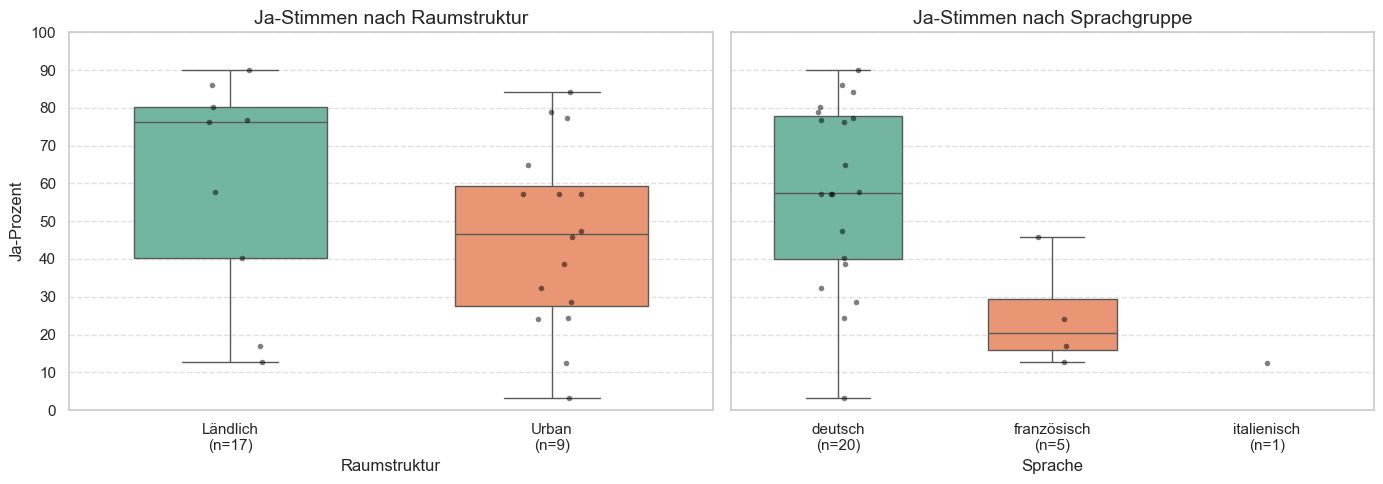

In [132]:
df_abstimmung_der_kantone = filter_for_abstimmung('Initiative für ein Schächtverbot')
boxplot_von_abstimmungen_nach_gruppen(df_abstimmung_der_kantone)

0      False
1      False
2       True
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool
    Kanton_Ja Ja-Prozent Kanton
0   zh-japroz      93.68     zh
1   be-japroz      40.80     be
2   lu-japroz      19.40     lu
3   ur-japroz       6.05     ur
4   sz-japroz      22.27     sz
5   ow-japroz      53.27     ow
6   nw-japroz       5.85     nw
7   gl-japroz      67.74     gl
8   zg-japroz      17.06     zg
9   fr-japroz      56.79     fr
10  so-japroz      68.92     so
11  bs-japroz      57.93     bs
12  bl-japroz      61.91     bl
13  sh-japroz      53.30     sh
14  ar-japroz      44.23     ar
15  ai-japroz       2.03     ai
16  sg-japroz      29.87     sg
17  gr-japroz      10.35     gr
18  ag-japroz      63.32     ag
19  tg-japroz      85.27     tg
20  ti-japroz      84.51     ti
21  vd-japroz      62.70     vd
22  vs-japroz      37.89     vs
23  ne-japroz      85.41     ne
24  ge-japro

/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{g}\n(n={raum_sizes[g]})" for g in raum_sizes.index])
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:80: UserWarning: set_ticklabels() should only be used with a fixed nu

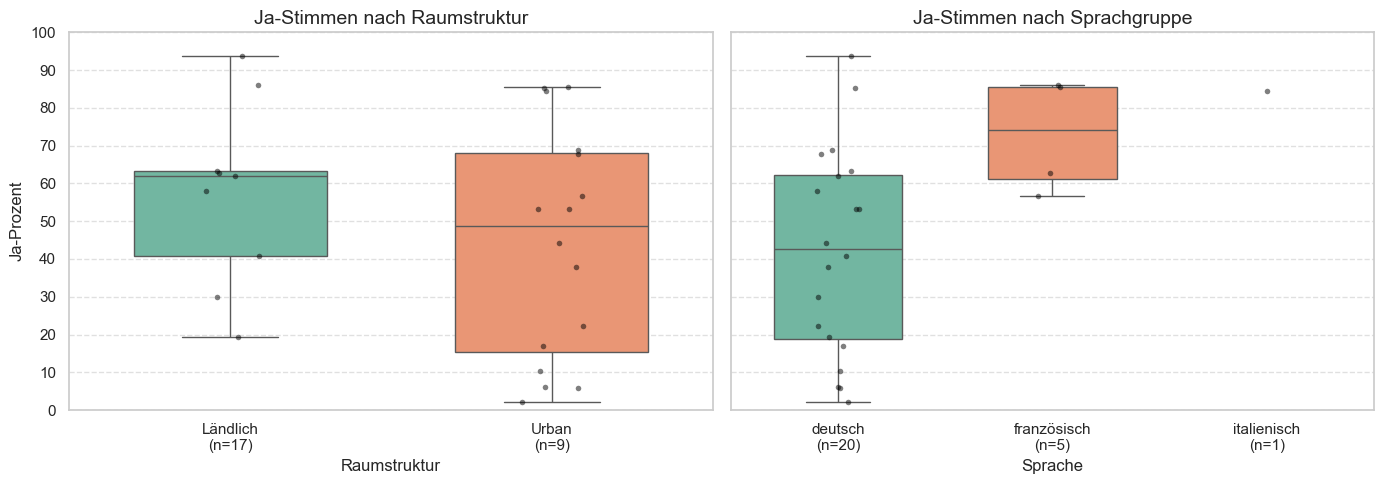

In [133]:
df_abstimmung_der_kantone = filter_for_abstimmung('Gleichstellung der Juden und Naturalisierten mit Bezug auf Niederlassung')
boxplot_von_abstimmungen_nach_gruppen(df_abstimmung_der_kantone)

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool
    Kanton_Ja Ja-Prozent Kanton
0   zh-japroz      36.20     zh
1   be-japroz      35.46     be
2   lu-japroz      21.34     lu
3   ur-japroz      14.58     ur
4   sz-japroz      14.23     sz
5   ow-japroz      14.34     ow
6   nw-japroz      19.50     nw
7   gl-japroz      19.11     gl
8   zg-japroz      24.26     zg
9   fr-japroz      29.83     fr
10  so-japroz      30.01     so
11  bs-japroz      46.76     bs
12  bl-japroz      37.28     bl
13  sh-japroz      31.89     sh
14  ar-japroz      15.48     ar
15  ai-japroz       4.87     ai
16  sg-japroz      19.33     sg
17  gr-japroz      22.36     gr
18  ag-japroz      22.76     ag
19  tg-japroz      19.94     tg
20  ti-japroz      37.08     ti
21  vd-japroz      51.30     vd
22  vs-japroz      30.52     vs
23  ne-japroz      52.18     ne
24  ge-japro

/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{g}\n(n={raum_sizes[g]})" for g in raum_sizes.index])
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:80: UserWarning: set_ticklabels() should only be used with a fixed nu

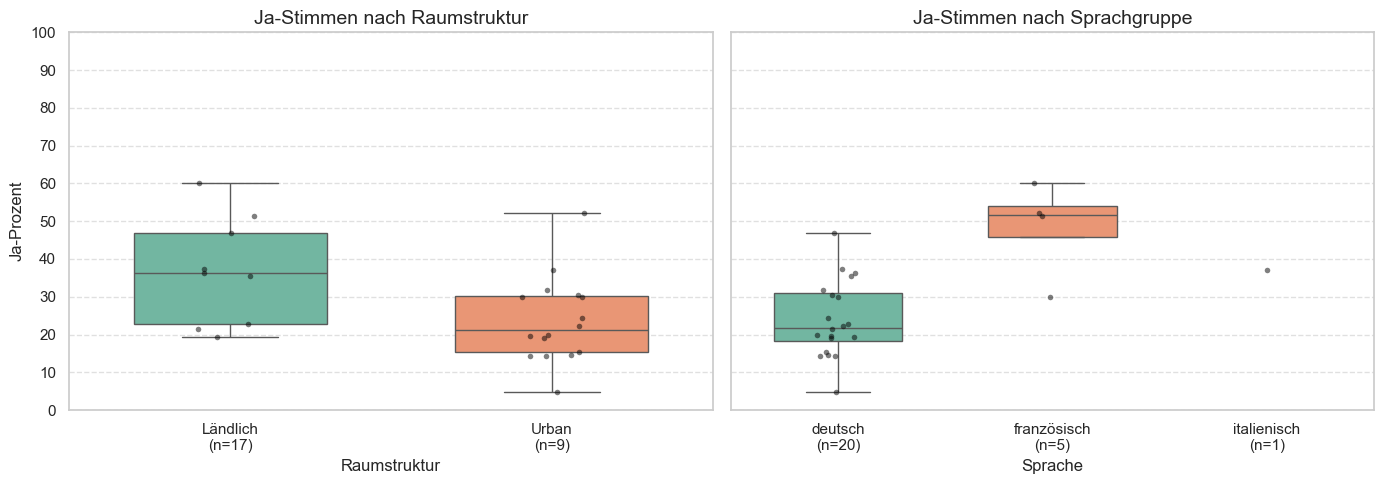

In [134]:
df_abstimmung_der_kantone = filter_for_abstimmung('Einführung des Frauenstimmrechts').iloc[[0]]
boxplot_von_abstimmungen_nach_gruppen(df_abstimmung_der_kantone)

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool
    Kanton_Ja Ja-Prozent Kanton
0   zh-japroz      82.42     zh
1   be-japroz      69.57     be
2   lu-japroz      88.50     lu
3   ur-japroz      85.44     ur
4   sz-japroz      85.85     sz
5   ow-japroz      89.31     ow
6   nw-japroz      86.51     nw
7   gl-japroz      80.65     gl
8   zg-japroz      87.06     zg
9   fr-japroz      90.14     fr
10  so-japroz      80.13     so
11  bs-japroz      85.96     bs
12  bl-japroz      84.95     bl
13  sh-japroz      79.21     sh
14  ar-japroz      73.07     ar
15  ai-japroz      87.04     ai
16  sg-japroz      82.99     sg
17  gr-japroz      82.90     gr
18  ag-japroz      80.24     ag
19  tg-japroz      81.14     tg
20  ti-japroz      95.05     ti
21  vd-japroz      88.60     vd
22  vs-japroz      91.89     vs
23  ne-japroz      84.69     ne
24  ge-japro

/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{g}\n(n={raum_sizes[g]})" for g in raum_sizes.index])
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:80: UserWarning: set_ticklabels() should only be used with a fixed nu

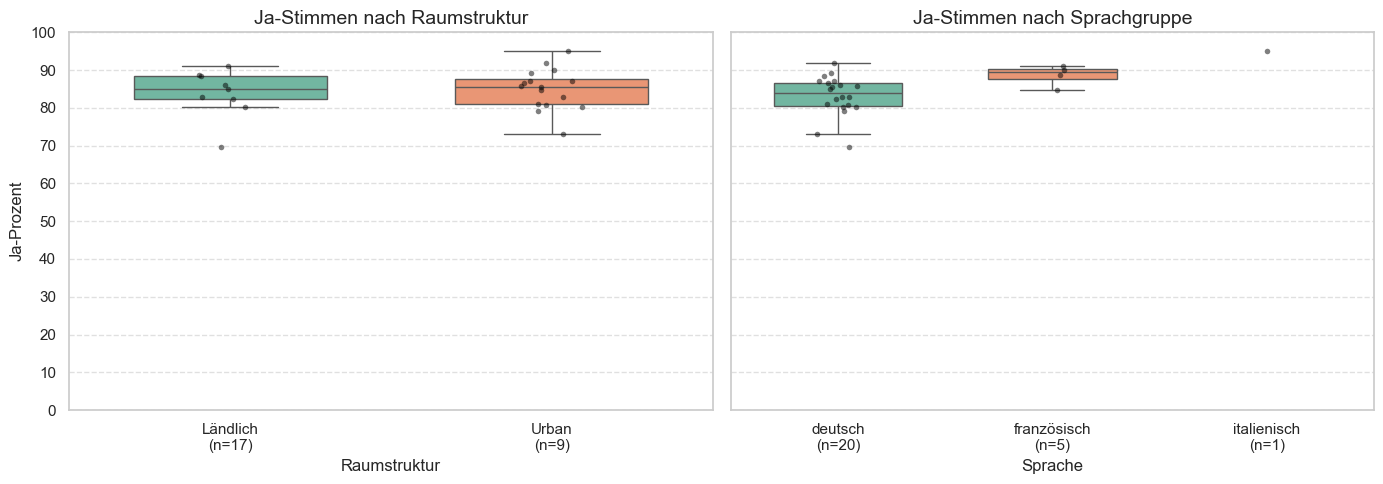

In [135]:
df_abstimmung_der_kantone = filter_for_abstimmung('Bundesbeschluss über die Gründung des Kantons Jura')
boxplot_von_abstimmungen_nach_gruppen(df_abstimmung_der_kantone)

0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Name: titel_kurz_d, Length: 696, dtype: bool
    Kanton_Ja Ja-Prozent Kanton
0   zh-japroz      52.68     zh
1   be-japroz      56.74     be
2   lu-japroz      56.84     lu
3   ur-japroz      57.50     ur
4   sz-japroz      50.22     sz
5   ow-japroz      55.60     ow
6   nw-japroz      53.06     nw
7   gl-japroz      55.88     gl
8   zg-japroz      52.79     zg
9   fr-japroz      53.73     fr
10  so-japroz      52.52     so
11  bs-japroz      71.01     bs
12  bl-japroz      63.68     bl
13  sh-japroz      54.81     sh
14  ar-japroz      52.72     ar
15  ai-japroz      43.20     ai
16  sg-japroz      52.89     sg
17  gr-japroz      56.15     gr
18  ag-japroz      39.16     ag
19  tg-japroz      46.24     tg
20  ti-japroz      58.43     ti
21  vd-japroz      54.35     vd
22  vs-japroz      44.13     vs
23  ne-japroz      57.96     ne
24  ge-japro

/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([f"{g}\n(n={raum_sizes[g]})" for g in raum_sizes.index])
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/sc/hk55c1v54g3dff0094vmwkb80000gn/T/ipykernel_5844/1164575833.py:80: UserWarning: set_ticklabels() should only be used with a fixed nu

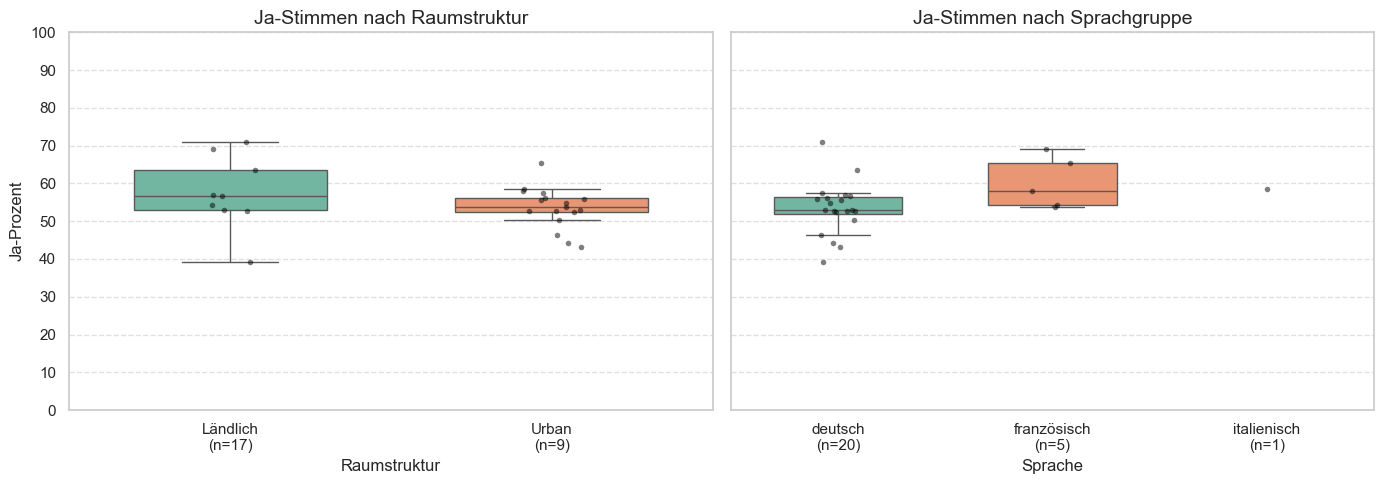

In [136]:
df_abstimmung_der_kantone = filter_for_abstimmung('Stopp dem Atomkraftwerkbau')
boxplot_von_abstimmungen_nach_gruppen(df_abstimmung_der_kantone)